In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetic.csv')

In [3]:
df.head()

,Sex,Age,Height,Weight,Blood sugar,Blood pressure,Type of diabetes,Complications of diabetes,Family history
0,male,64,160,90,196,90.6,2,eye,1
1,male,64,175,65,128,110.6,2,Nervous,1
2,male,55,168,77,211,100.6,1,eye,1
3,female,54,155,84,154,110.5,2,eye,1
4,male,41,173,66,192,90.6,2,Nervous,2


###### Database of diabetic patients.

###### It includes data from different people.

###### Including characteristics = gender, age, height, weight, blood sugar, blood pressure, type of diabetes, incidence of complications and family history

Sex: The gender of the individual (male or female).
    
age: The age of the individual.
    
height: The height of the individual.
    
weight: The weight of the individual.
    
blood sugar: The blood sugar level of the individual.
    
blood pressure: The blood pressure of the individual.
    
type of diabetes: The type of diabetes the individual has (Type 1 or Type 2).
    
Complications of diabetes: Any complications the individual has due to diabetes.
    
Family history: Whether there is a family history of diabetes (1 or 2).

In [4]:
df.describe()

,Age,Height,Weight,Blood sugar,Blood pressure,Type of diabetes,Family history
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,54.173333,162.906667,74.346667,191.946667,122.662667,1.720000,1.426667
std,12.108042,8.235016,11.542511,47.087869,16.563953,0.452022,0.497924
min,15.000000,147.000000,50.000000,128.000000,90.600000,1.000000,1.000000
25%,47.500000,158.000000,67.000000,163.000000,110.700000,1.000000,1.000000
50%,55.000000,160.000000,75.000000,178.000000,120.800000,2.000000,1.000000
75%,63.000000,168.000000,80.000000,216.500000,130.800000,2.000000,2.000000
max,77.000000,192.000000,110.000000,315.000000,160.800000,2.000000,2.000000


###### Descriptive statistics to see count, mean, standard deviation, min, max, 25% (lower) quartile, and so on..

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex                        75 non-null     object 
 1   Age                        75 non-null     int64  
 2   Height                     75 non-null     int64  
 3   Weight                     75 non-null     int64  
 4   Blood sugar                75 non-null     int64  
 5   Blood pressure             75 non-null     float64
 6   Type of diabetes           75 non-null     int64  
 7   Complications of diabetes  75 non-null     object 
 8   Family history             75 non-null     int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 5.4+ KB


###### No null values from the data. There are 75 rows and 9 columns.

In [6]:
df.isnull().sum()

Sex                          0
Age                          0
Height                       0
Weight                       0
Blood sugar                  0
Blood pressure               0
Type of diabetes             0
Complications of diabetes    0
Family history               0
dtype: int64

In [7]:
df.duplicated().sum()

0

###### No duplicated values in the data diabetic.csv

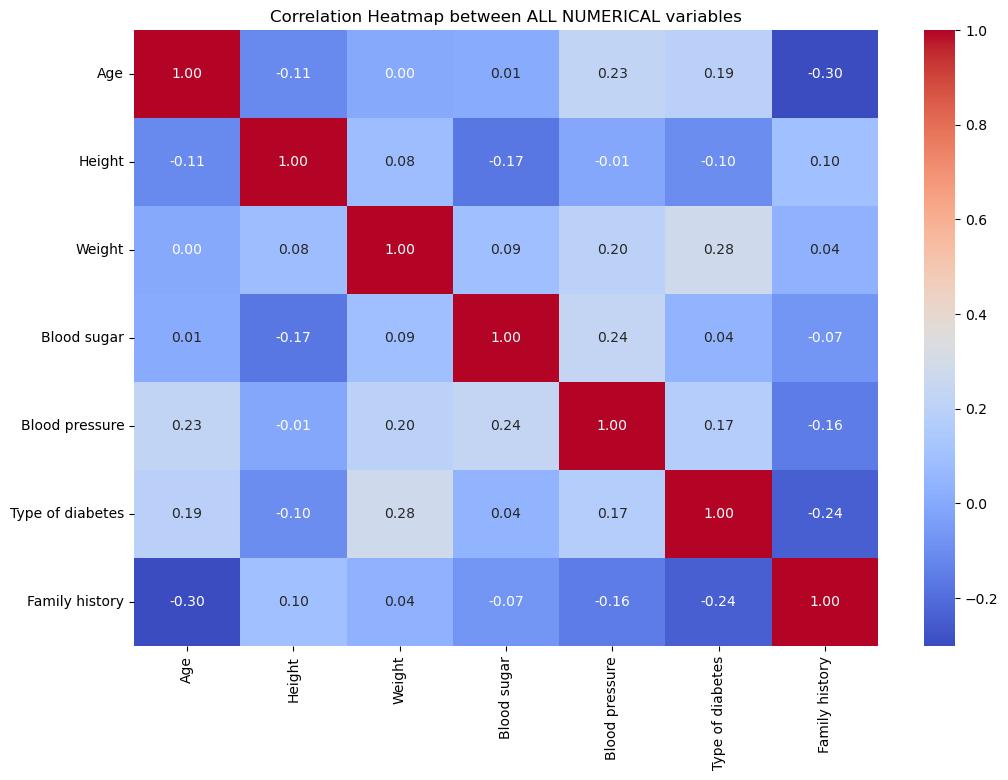

In [8]:
# Selecting numeric columns and the 'Complications of diabetes' column
columns_to_include = ['Age', 'Height', 'Weight', 'Blood sugar', 'Blood pressure', 'Type of diabetes', 'Family history']
numeric_df = df[columns_to_include]

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between ALL NUMERICAL variables')
plt.show()

###### This heat map represents a general correlation between all numerical variables in the data: 
###### age, height, weight, blood sugar, blood pressure, type of diabetes and family history

##### My observation: None of the variables make strong correlation with each other.
##### The strongest positive correlation is a value of 0.28; Type of diabetes VS weight.
##### Since it is below 0.5, hence very weak positive correlation.

In [9]:
# in table form
numeric_df.corr(method = 'pearson')

,Age,Height,Weight,Blood sugar,Blood pressure,Type of diabetes,Family history
Age,1.000000,-0.111240,0.000725,0.007411,0.226328,0.191699,-0.301581
Height,-0.111240,1.000000,0.082661,-0.173423,-0.009527,-0.101503,0.098826
Weight,0.000725,0.082661,1.000000,0.094639,0.198563,0.280450,0.035050
Blood sugar,0.007411,-0.173423,0.094639,1.000000,0.236757,0.041827,-0.069909
Blood pressure,0.226328,-0.009527,0.198563,0.236757,1.000000,0.174740,-0.156811
Type of diabetes,0.191699,-0.101503,0.280450,0.041827,0.174740,1.000000,-0.242564
Family history,-0.301581,0.098826,0.035050,-0.069909,-0.156811,-0.242564,1.000000


In [10]:
# Now I wanted to find out the various complications of diabetes to individuals from this dataset: 

complications_counts = df['Complications of diabetes'].value_counts()

complications_df = pd.DataFrame({'Complications of diabetes': complications_counts.index, 'Count': complications_counts.values})

print(complications_df)


            Complications of diabetes  Count
0                                 eye     15
1                          no problem      9
2                             Nervous      9
3                              kidney      5
4                     eye and Nervous      5
5                           digestive      4
6                     Nervous and eye      4
7                        eye and skin      3
8                   eye and digestive      3
9                   digestive and eye      2
10  Nervous Gastrointestinal and skin      2
11                     eye and kidney      2
12      digestive and eye and Nervous      1
13                       skin and eye      1
14                         eye kidney      1
15               digestive and kidney      1
16                 kidney and Nervous      1
17           digestive and rheumatism      1
18                     kidney and eye      1
19        Nervous and kidney and skin      1
20        Nervous and sexual problems      1
21        

###### My observation: Most individuals have eye complications due to diabetes, followed by 'no problem', nervous and others.
###### It is interesting how the complications of diabetes can vary widely from one individual to another.
###### From this data alone, we can identify 24 types of complications to those suffering from diabetes. 
###### Imagine the diversity among diabetic patients whose data we have not yet collected.

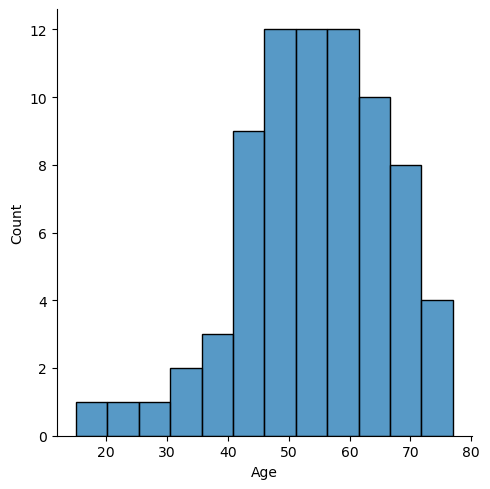

In [11]:
# What is the distribution of age for individuals in this diabetic dataset?

sns.displot(df, x="Age", binwidth=5)

###### The distribution plot above illustrates the demographic of 45 - 65 years old commands the highest count, surpassing all other age brackets.

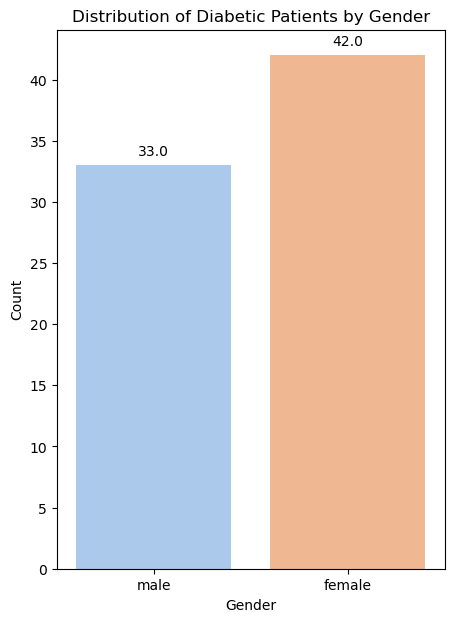

In [12]:
# MALE VS FEMALE bar chart

plt.figure(figsize=(5, 7))
ax = sns.countplot(x='Sex', data=df, palette='pastel', hue='Sex')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Diabetic Patients by Gender')
plt.show()


###### My observation: The count of females is higher than the males based on this data.
###### This data was collected from only 75 individuals in the database of diabetic patients in Iran.
###### https://filemap.sellfile.ir/prod-790377-%D8%AF%DB%8C%D8%AA%D8%A7%D8%B3%D8%AA+%D8%A8%DB%8C%D9%85%D8%A7%D8%B1%D8%A7%D9%86+%D8%AF%DB%8C%D8%A7%D8%A8%D8%AA%DB%8C.html 
###### Nothing much can be said because we need a bigger sample to fairly compare both genders being diabetic.

Number of Females (original data): 42
Number of Males (original data): 33


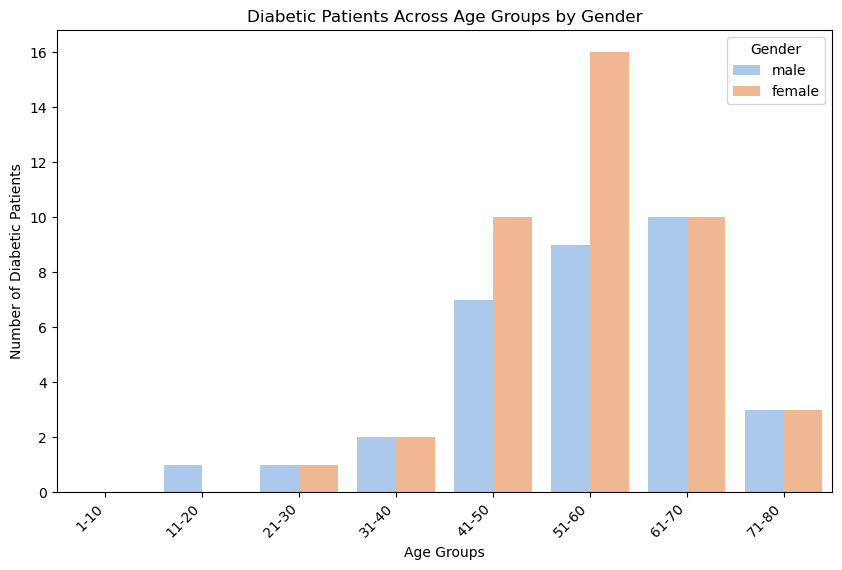

In [13]:
# What is the distribution of male and female being diabetic across all ages of population?

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))

sns.countplot(x='Age Group', hue='Sex', data=df, palette='pastel')

plt.xlabel('Age Groups')
plt.ylabel('Number of Diabetic Patients')
plt.title('Diabetic Patients Across Age Groups by Gender')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45, ha='right')

# used value_counts() to count the number of males and females from the data
sex_counts = df['Sex'].value_counts()

# Displaying the original counts of females and males from the dataset
print("Number of Females (original data):", sex_counts['female'])
print("Number of Males (original data):", sex_counts['male'])

plt.show()

###### My observation: The ratio of male to female patients is generally similar across all age groups, except for those in the 41-60 years old 
###### category. There is also a huge difference male to female in the 51-60 years old category.
###### Given that the original database collected data from 42 females and 33 males, we observe that the higher ratio of female patients 
###### contributing to this result is influenced by the fact that the original dataset contains more females than male patients.

In [14]:
# Filter data for age groups 41-50 and 51-60
filtered_data_41_50 = df[df['Age Group'] == '41-50']
filtered_data_51_60 = df[df['Age Group'] == '51-60']

# Calculate the percentage of male and female patients with diabetes for each age group
total_patients_41_50 = len(filtered_data_41_50)
total_patients_51_60 = len(filtered_data_51_60)

male_percentage_41_50 = (filtered_data_41_50['Sex'] == 'male').sum() / total_patients_41_50 * 100
female_percentage_41_50 = (filtered_data_41_50['Sex'] == 'female').sum() / total_patients_41_50 * 100

male_percentage_51_60 = (filtered_data_51_60['Sex'] == 'male').sum() / total_patients_51_60 * 100
female_percentage_51_60 = (filtered_data_51_60['Sex'] == 'female').sum() / total_patients_51_60 * 100

# Display the results
print(f"Percentage of Male Patients (41-50 years old): {male_percentage_41_50:.2f}%")
print(f"Percentage of Female Patients (41-50 years old): {female_percentage_41_50:.2f}%")
print()
print(f"Percentage of Male Patients (51-60 years old): {male_percentage_51_60:.2f}%")
print(f"Percentage of Female Patients (51-60 years old): {female_percentage_51_60:.2f}%")


Percentage of Male Patients (41-50 years old): 41.18%
Percentage of Female Patients (41-50 years old): 58.82%

Percentage of Male Patients (51-60 years old): 36.00%
Percentage of Female Patients (51-60 years old): 64.00%


In [15]:
# Transforming the above result into a table
from tabulate import tabulate
table_data = [
    ("Age Group (years old)", "Male Percentage", "Female Percentage"),
    ("41-50", f"{male_percentage_41_50:.2f}%", f"{female_percentage_41_50:.2f}%"),
    ("51-60", f"{male_percentage_51_60:.2f}%", f"{female_percentage_51_60:.2f}%"),
]

# Display the tabulated results
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════════════════╤═══════════════════╤═════════════════════╕
│ Age Group (years old)   │ Male Percentage   │ Female Percentage   │
╞═════════════════════════╪═══════════════════╪═════════════════════╡
│ 41-50                   │ 41.18%            │ 58.82%              │
├─────────────────────────┼───────────────────┼─────────────────────┤
│ 51-60                   │ 36.00%            │ 64.00%              │
╘═════════════════════════╧═══════════════════╧═════════════════════╛


##### The above table shows the percentages for each gender in each age group category.
##### For the 51-60 years old patients, females almost double the percentage of males with 28% difference.

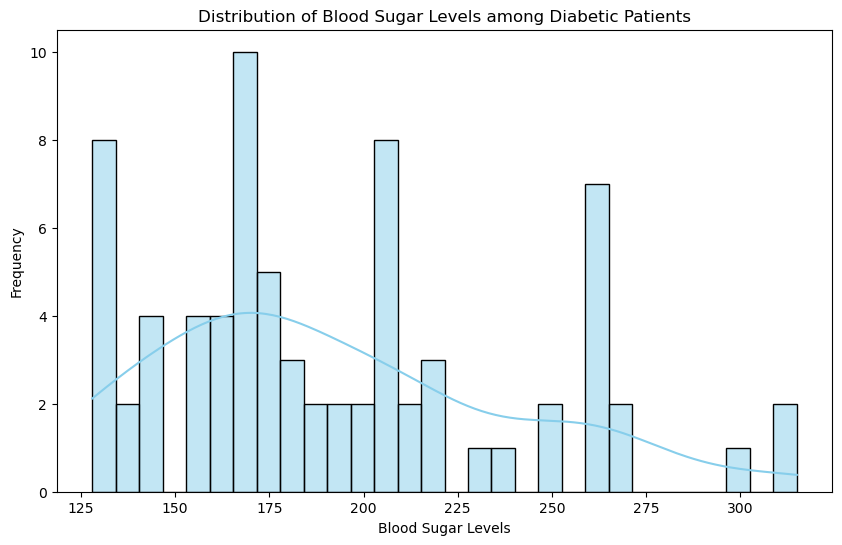

In [17]:
df_subset = df[['Blood sugar', 'Complications of diabetes']]
# Distribution of blood sugar levels
plt.figure(figsize=(10, 6))
sns.histplot(df_subset['Blood sugar'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Blood Sugar Levels among Diabetic Patients')
plt.xlabel('Blood Sugar Levels')
plt.ylabel('Frequency')
plt.show()


In [27]:
# Calculating BMI for each patient
df['BMI'] = df['Weight'] / ((df['Height']/100)**2)
df.to_csv('data_with_bmi.csv', index=False)
df.tail(75)

,Sex,Age,Height,Weight,Blood sugar,Blood pressure,Type of diabetes,Complications of diabetes,Family history,Age Group,BMI
0,male,64,160,90,196,90.6,2,eye,1,61-70,35.156250
1,male,64,175,65,128,110.6,2,Nervous,1,61-70,21.224490
2,male,55,168,77,211,100.6,1,eye,1,51-60,27.281746
3,female,54,155,84,154,110.5,2,eye,1,51-60,34.963580
4,male,41,173,66,192,90.6,2,Nervous,2,41-50,22.052190
...,...,...,...,...,...,...,...,...,...,...,...
70,male,65,160,80,270,160.6,2,Nervous,1,61-70,31.250000
71,female,69,167,56,206,140.6,2,eye and skin,2,61-70,20.079601
72,female,58,160,59,260,115.6,1,eye and Nervous,2,51-60,23.046875
73,male,41,166,77,186,120.8,2,digestive and eye,1,41-50,27.943098


In [32]:
stats = df['BMI'].describe()
stats

count    75.000000
mean     28.169559
std       4.806893
min      17.301038
25%      25.111661
50%      28.720083
75%      31.447159
max      39.062500
Name: BMI, dtype: float64

###### The stats above is showing the descriptive analysis about the BMI column we just made.
###### The mean BMI of all patients is 28.17, the minimum BMI is 17.30 and the maximum BMI one has is 39.06 out of all 75 patients.

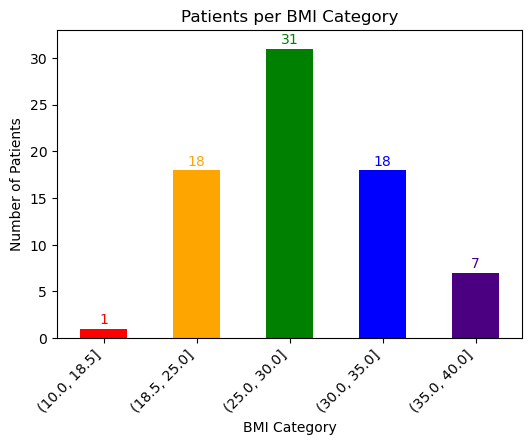

In [40]:
# Create BMI categories
bmi_categories = [10.0, 18.5, 25, 30, 35, 40]

# Cut into BMI groups
df['BMI_group'] = pd.cut(df['BMI'], bins=bmi_categories)

# Create color map
colors = ['red','orange','green','blue','indigo']

ax = (df.groupby('BMI_group')
        .count()
        .iloc[:,0]
        .plot(kind='bar', figsize=(6,4), 
              color=colors, title="Patients per BMI Category"))

ax.set_xlabel("BMI Category")
ax.set_ylabel("Number of Patients")

# Label each bar
for p, c in zip(ax.patches, colors):
    x = p.get_x()+p.get_width()/2
    y = p.get_height()
    ax.text(x, y+0.5, str(y), ha='center', color=c)

ax.set_ylim(0, max(counts)+2)  
plt.xticks(rotation=45, ha='right')

plt.show()

Classification of Body Mass Index (BMI):

Underweight: <18.5
    
Normal: 18.5 - 25
    
Overweight: 25 - 30
    
Obesity (1st class): 30 - 35
    
Obesity (2nd class): 35 - 40
    
Extreme Obesity (3rd class): >40.0

###### My observation:
###### The BMI group from 25-30 (overweight) has the highest count of patients.
###### This shows most diabetic patients are overweight and obese.
###### Excessive weight is likely connected to or impacting their diabetes
###### Bringing BMIs to under 25 may help the diabetic patients.